In [22]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd

In [23]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

rows = df.shape[0]
print(rows)
df.head(5)

# We'll regress petal width

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
trainSize = int(0.8 * rows)

# to_numpy and squeeze for micrograd compatibility

trainX = df.iloc[:trainSize,:-1].to_numpy()
trainY = df.iloc[:trainSize,-1:].to_numpy().squeeze(1)

testX = df.iloc[trainSize:,:-1].to_numpy()
testY = df.iloc[trainSize:,-1:].to_numpy().squeeze(1)

print(f'train size: {len(trainX)}')
print(f'test size: {len(testY)}')

print(trainX[:1])
print(testX[:1])
# trainY.head(1)

train size: 120
test size: 30
[[5.1 3.5 1.4]]
[[6.9 3.2 5.7]]


First we'll compare the MSE between models

In [25]:
linreg = LinearRegression(copy_X=True).fit(trainX, trainY)
lrPreds = linreg.predict(testX)
mse = mean_squared_error(testY, lrPreds)
mse

0.09499934208144371

In [26]:
import nn
from micrograd import Value
from utils import train_mlp_mse, predict
from visualizers import visualizeMlp

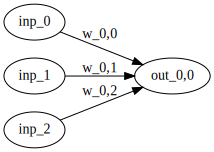

In [27]:
nnLR = nn.LinearRegressor(len(trainX[0]), activation=Value.Identity)
visualizeMlp(nnLR)

In [28]:
epochs = 500
lr = 0.0001 # learning rate needs to be really small. Loss was exploding with 0.001 and above
loss = train_mlp_mse(nnLR, trainX, trainY, epochs=epochs, lr=lr, verbose=False)
nnPreds = predict(nnLR, testX)
loss[-1:]

# loss gets stuck at around 59.49
# I think I am running into the vanishing gradients problem, and
# the model stops learning at one point. Implementing more activations

# OHHH actually, there should be no activation! this is linear regression!

# Not able to do much better than around 2.8 loss with 1000 epochs and 0.0001 learning rate
# and we approach this min loss around 100-500 epochs (varies). I think we need much better 
# initialization for network to do better

[0.10779453231098389]

Let's compare individual predictions

In [29]:
linreg.predict(testX[:5])

array([1.97506335, 1.74310351, 2.25376822, 1.5950917 , 2.03038313])

In [30]:
predict(nnLR, testX[:5])

[[Value(data=1.9815020557065404)],
 [Value(data=1.521346630962297)],
 [Value(data=2.7787886509260433)],
 [Value(data=1.839270787286899)],
 [Value(data=1.8487866778122701)]]

In [31]:
print(mean_squared_error(testY, nnPreds))
print(sum(pred[0].squaredDist(gold) for pred, gold in zip(nnPreds, testY)).data / len(testY))

# Why are these values different?
# loss was *not* normalizing over number of examples (not dividing by len(testY))
# it's just a constant so it doesn't matter for gradient descent, but necessary
# for interpreting loss as the mse of predictions

Value(data=0.16953887439780266)
0.16953887439780266


In [32]:
nnLR.parameters()

[Value(data=0.3704175568606625),
 Value(data=-0.5863186652213832),
 Value(data=0.2664250836424197),
 Value(data=-0.21678233468539676)]